# Project 2  EDA

In [40]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---
### 1.1 Load the file with the `csv` module and put it in a Python dictionary

In [41]:
data = []
with open('sat_scores.csv') as f:
    data = f.readlines()
    
data = [x.replace('\n','') for x in data]
head = data[0].split(',')
data = data[1:]
sat_dict = { h:[r.split(',')[i] for r in data] for i,h in enumerate(head)}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

In [42]:
sat_scores = pd.DataFrame(sat_dict)
sat_df = pd.read_csv('sat_scores.csv')

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

In [43]:
sat_df.head(10) 
# The sat scores data describe verbal and math score in each state of USA as well as its ranking among all states.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

In [44]:
description = {
'State': 'State column describe the state where those statistics come from',
'Rate': 'Rate column descrebe the state statistics rating among all recorded states',
'Verbal': 'Verbal describe the average verbal scores of one state',
'Math': 'Math describe the average math scores of one state'}

In [45]:
data_dictionary = {
    'State': {'type': sat_df['State'].dtypes, 'description': description['State']},
    'Rate': {'type': sat_df['Rate'].dtypes, 'description': description['Rate']},
    'Verbal': {'type': sat_df['Verbal'].dtypes, 'description': description['Verbal']},
    'Math': {'type': sat_df['Math'].dtypes, 'description': description['Math']},
    'shape': sat_df.shape
}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

In [ ]:
sns.distplot(sat_df['Rate'], kde=False)

In [ ]:
sns.distplot(sat_df['Verbal'], kde=False)

In [ ]:
sns.distplot(sat_df['Math'], kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

In [ ]:
sns.pairplot(data=sat_df, kind="reg")

# Column rate has negitive relation with both verbal and math columns
# Column verbal and math have strong positive corelation to each others.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---
### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [ ]:
sat_df.iloc[:,2:].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [ ]:
sat_df.iloc[:,2:].plot.box()

# Using box plot can easily compare two dataset directly
# Alse box plot can point out outliers if any

In [ ]:
sat_df.iloc[:,1:].plot.box()

# Rate has different figure range comparing to math and verbal

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

In [ ]:
standerdized_sat_df = (sat_df.iloc[:,1:] - sat_df.iloc[:,1:].mean()) / sat_df.iloc[:,1:].std()
standerdized_sat_df.plot.box()

# standerdize all data

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [ ]:
greater = sat_df[sat_df.Verbal > sat_df.Verbal.mean()].State.values
print 'There are {} states having above average mean out of {} states.'.format(len(greater), len(sat_df.Verbal))

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [ ]:
sat_df[sat_df.Verbal > np.median(sat_df.Verbal)].State.values

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

In [104]:
sat_df['Verbal-Math'] = np.abs(sat_df.Verbal - sat_df.Math)
sat_df.head()

,State,Rate,Verbal,Math,RatePercentile,Verbal-Math
0,CT,82,509,510,67.82,1
1,NJ,81,499,513,67.31,14
2,MA,79,511,515,65.58,4
3,NY,77,495,505,65.00,10
4,NH,72,520,516,59.16,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. DF1 should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. DF2 will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, showing the top 3 states in each.

In [ ]:
df1 = sat_df[sat_df.Verbal > sat_df.Math].sort_values('Verbal-Math', ascending=False).head(10)
df1.head(3)

In [ ]:
df2 = sat_df[sat_df.Verbal < sat_df.Math].sort_values('Verbal-Math', ascending=False).head(10)
df2.head(3)

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [ ]:
sat_df.corr()

# According to the correlation matrix: rate has strong nagetive relation with both verbal and math.
# Math and verval have strong positive relation to each other
# The different between verbal and math has very little relation to rank, verabal and math.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [ ]:
sat_df.describe()

# count: how many rows they have
# mean: mean of the column
# std: standard diviation of the column
# min: minnimun figure in the column
# 25%: figures fall in 25% percentile 
# 50%: figures fall in 50% percentile 
# 75%: figures fall in 75% percentile 
# max: maximum figure in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [ ]:
sat_df.cov()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

### 7.1 https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

In [16]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('drug-use-by-age.csv', index_col=0)

# Missing data could interupt numerical calculation between columns
# replace missing data '-' with np.nan
df.iloc[:,2:] = df.iloc[:,2:].applymap(lambda x: np.nan if x == '-' else x)

### 7.2 Do a high-level, initial overview of the data

In [20]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df.head(3)

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


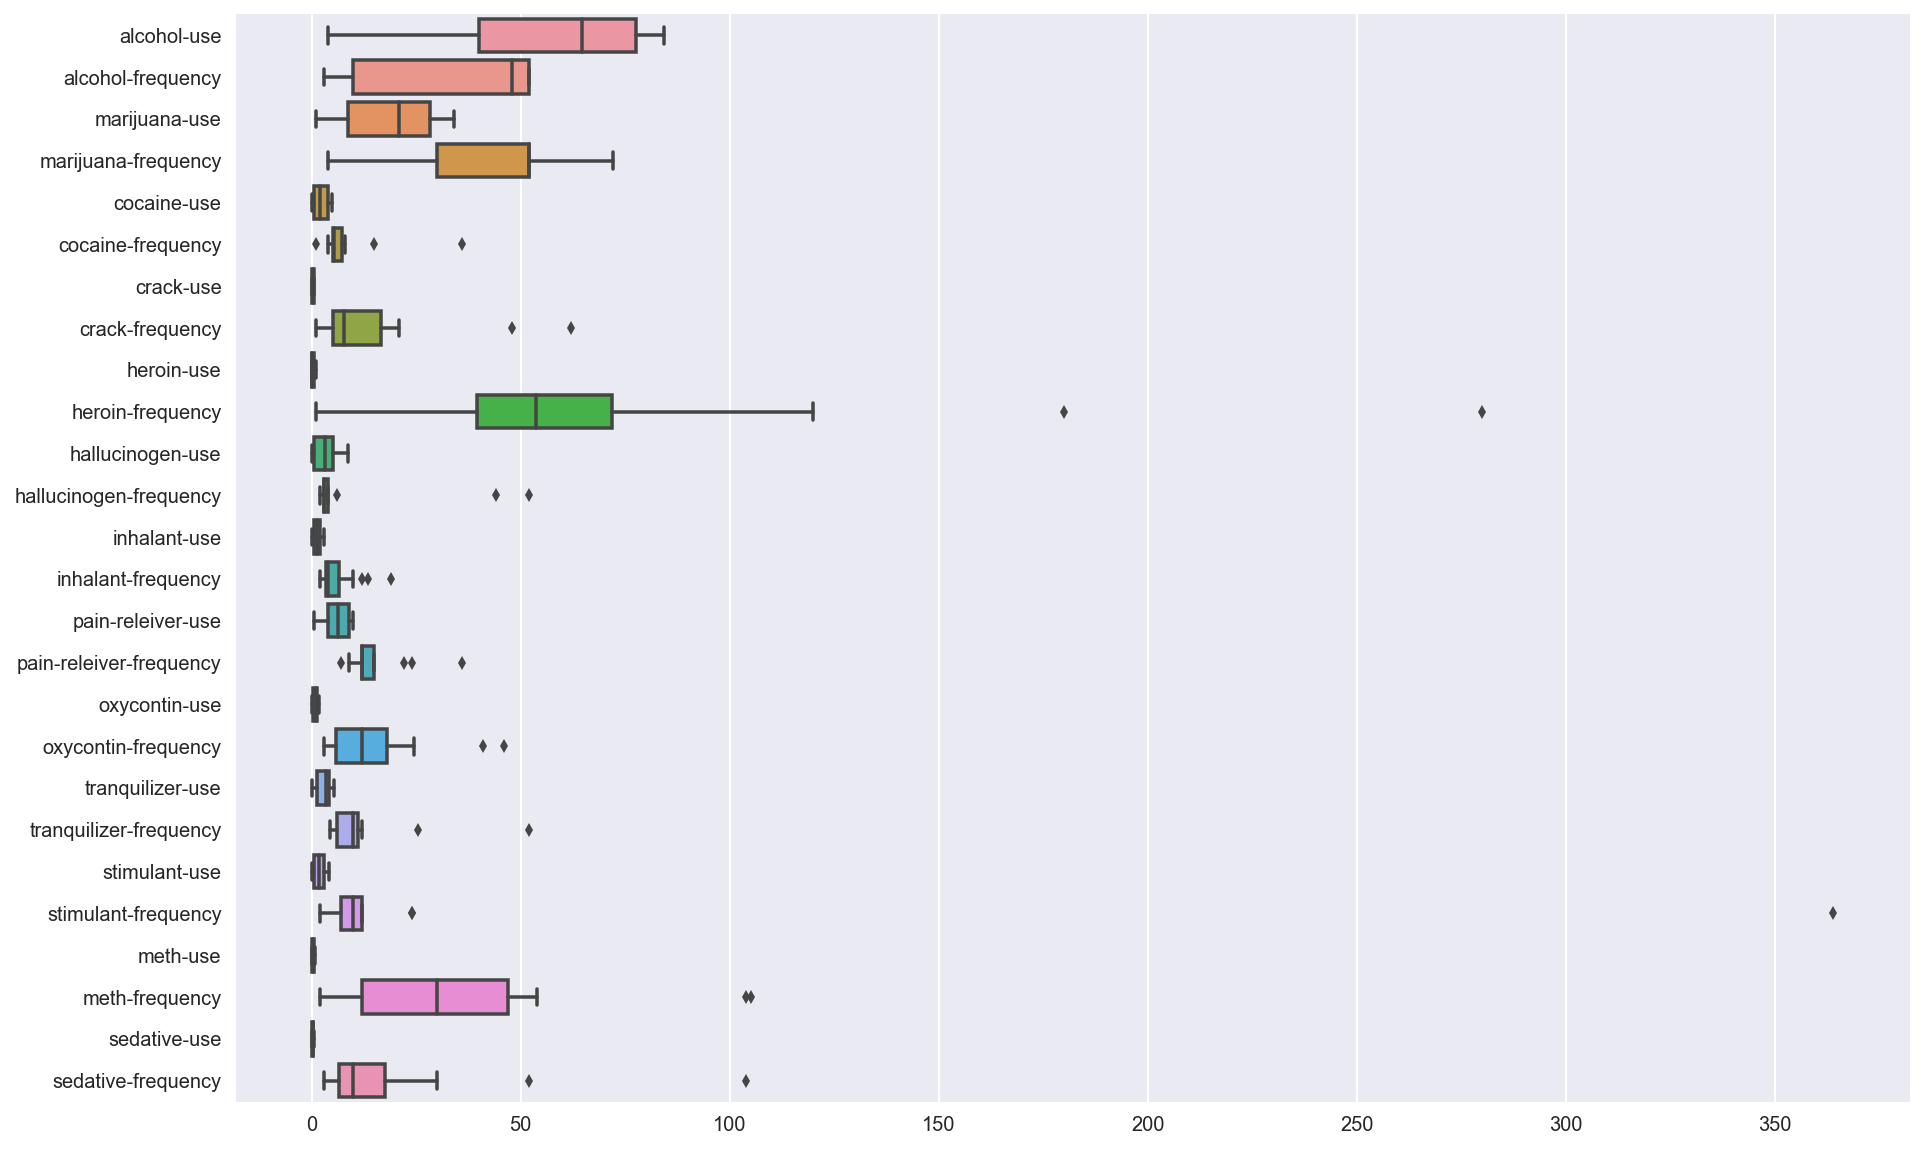

In [105]:
plt.figure(figsize=(15,10))
sns.boxplot(df.iloc[:,1:], orient='h')

In [22]:
# unwanted columns: n, 
# crack-use, crack-frequency, heroin-use, heroin-frequency, 
# meth-use, meth-frequency, sedative-use, sedative-frequency
# is irrlevent since the figure is rather small or missing

# df = df.drop(['n', 'crack-use', 'crack-frequency', 
#               'heroin-use', 'heroin-frequency', 
#               'meth-use', 'meth-frequency', 
#               'sedative-use', 'sedative-frequency'],axis=1)

#df

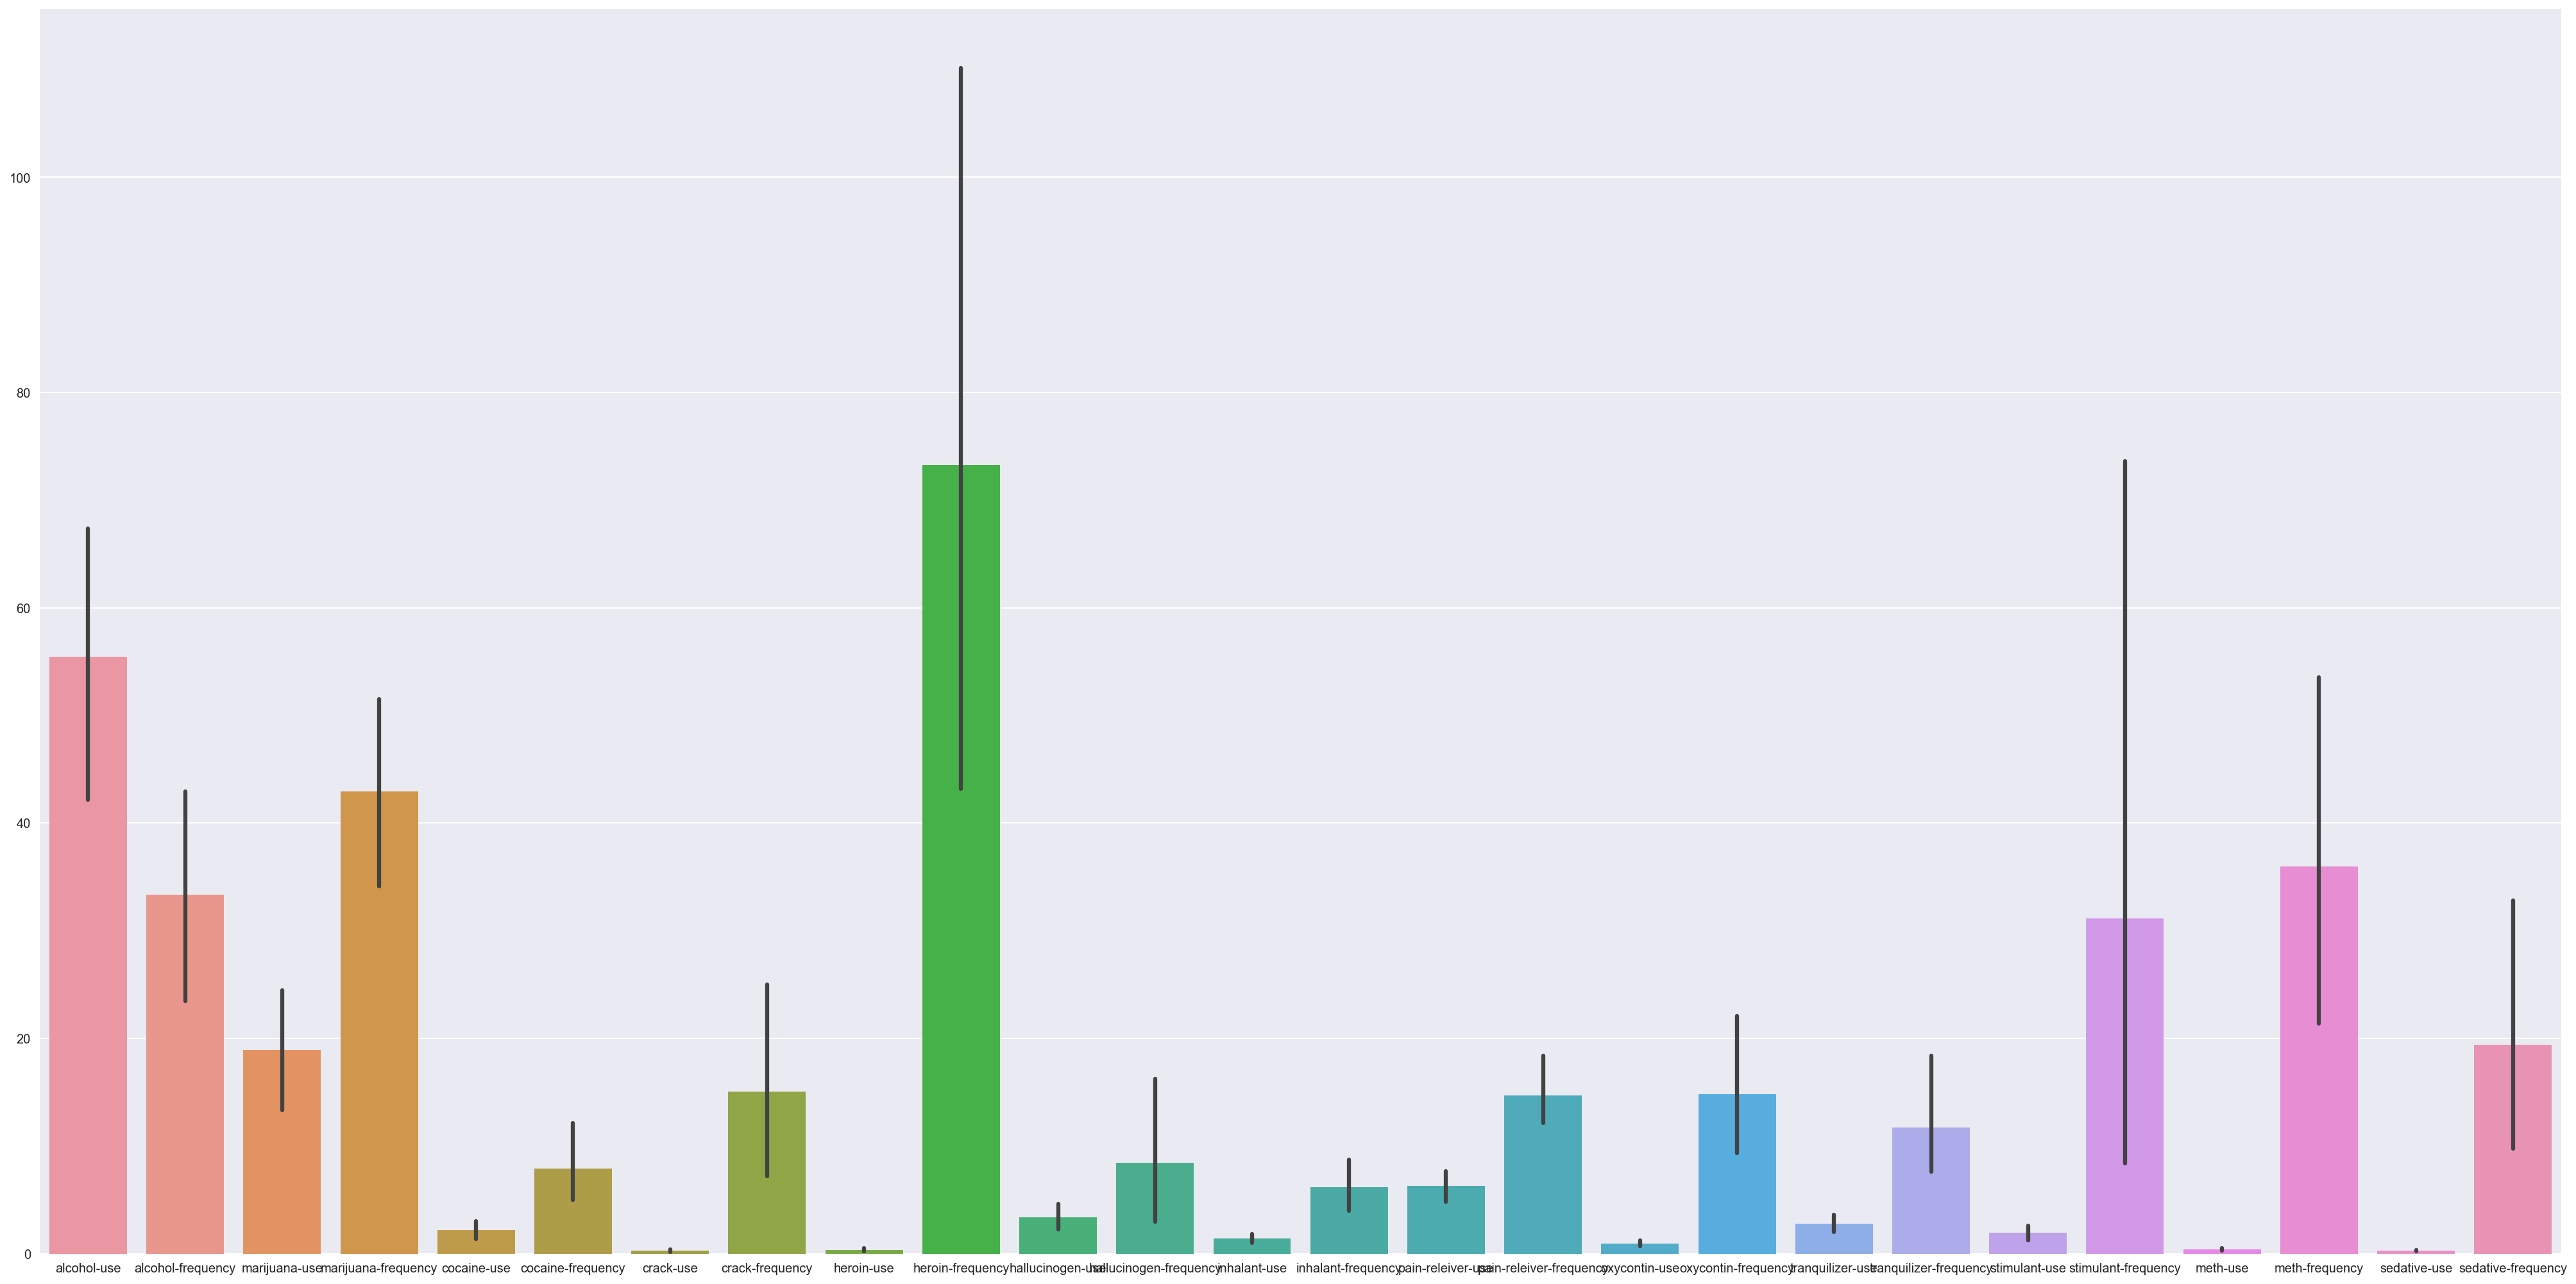

In [24]:
sns.factorplot(data=df.iloc[:,1:], kind='bar', size=14, aspect=2)

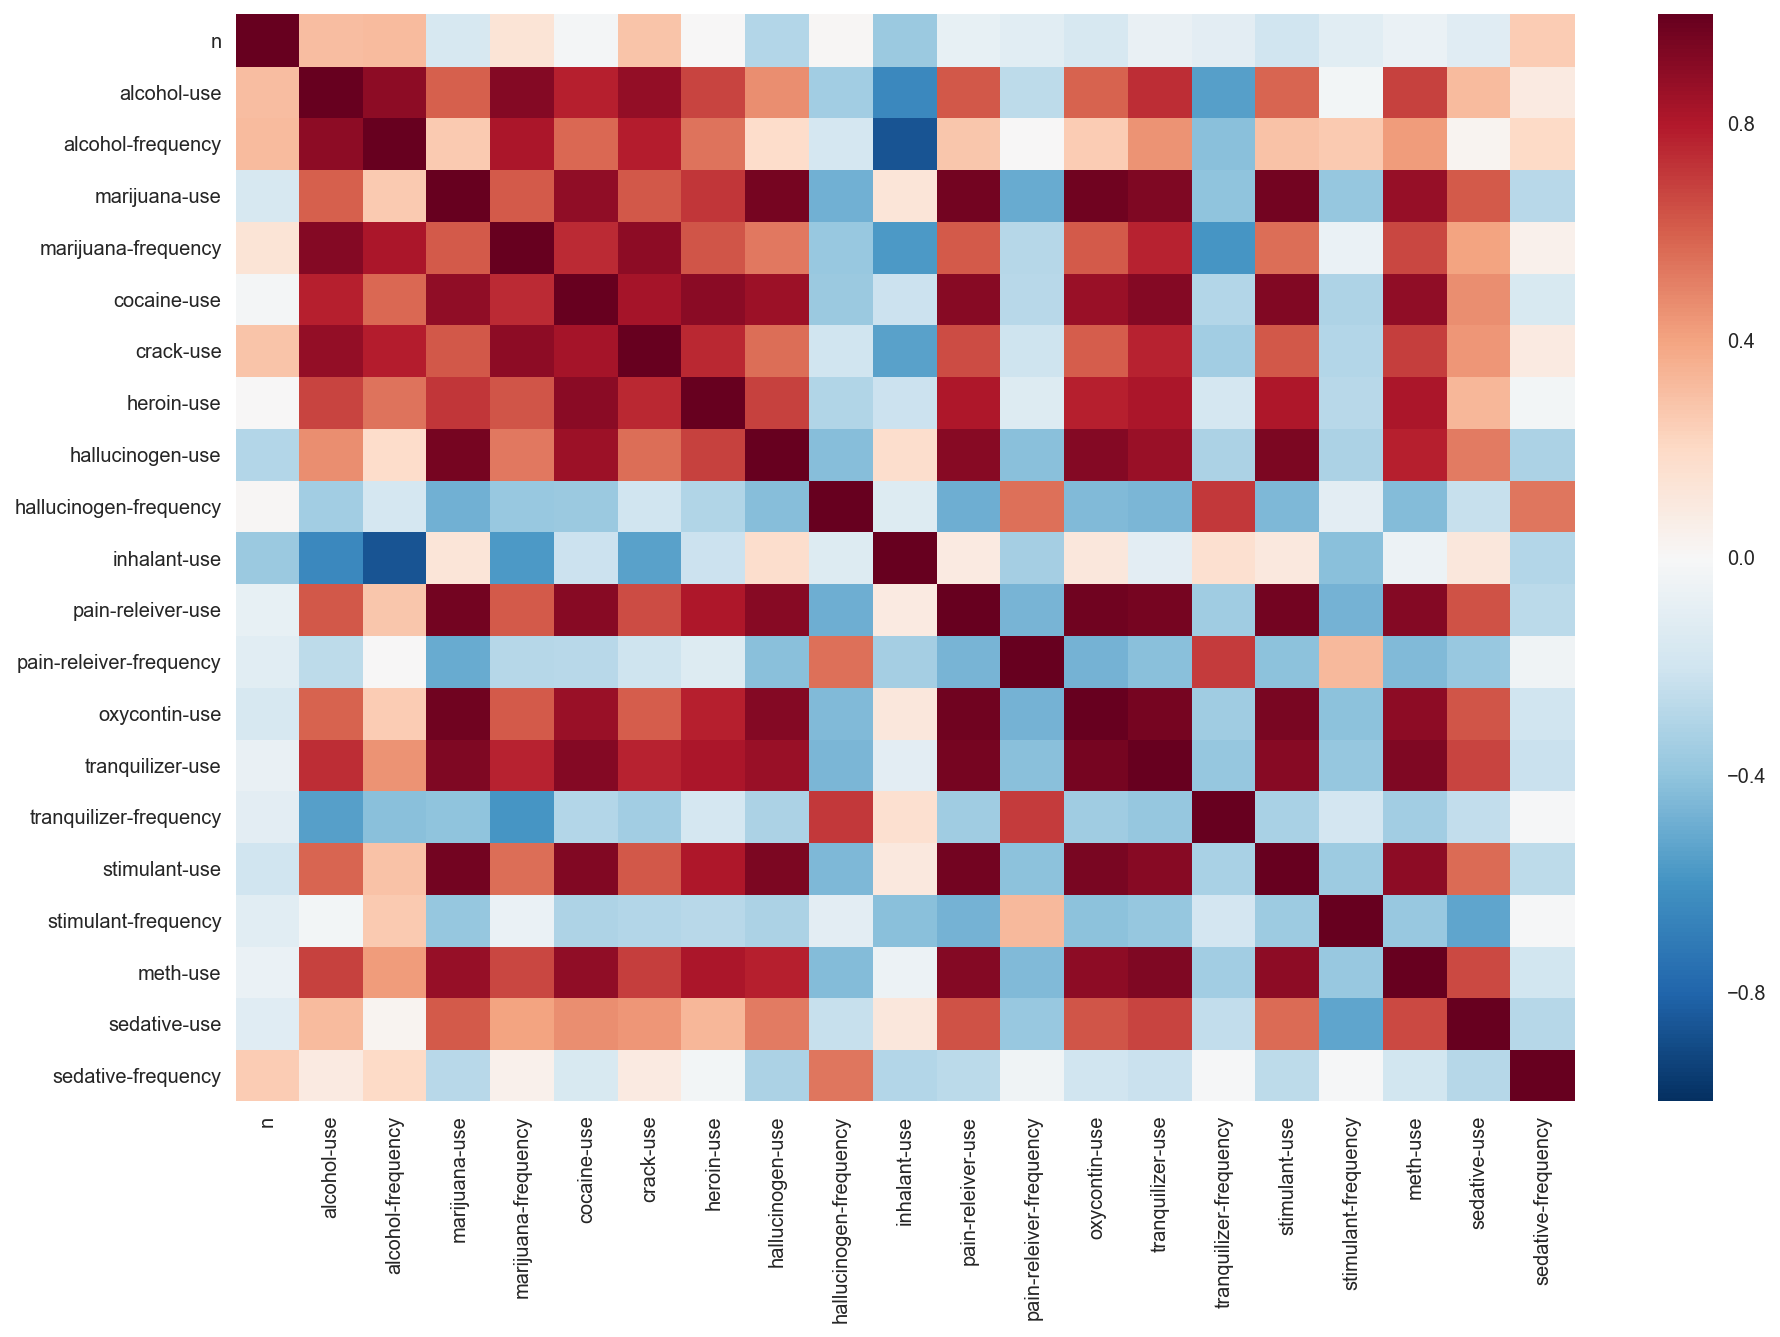

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [83]:
d = df.iloc[:,1:].applymap(lambda x: float(x))

for i in range(len(d.columns) / 2):
    d[d.iloc[:,i*2].name.split('-')[0]] = d.iloc[:,i*2] * d.iloc[:,i*2+1]
d_new = d.iloc[:,26:]
d_new

,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain,oxycontin,tranquilizer,stimulant,meth,sedative
age,,,,,,,,,,,,,
12,11.7,4.4,0.50,NaN,3.55,10.4,30.40,72.0,2.45,10.40,0.4,NaN,2.60
13,51.0,51.0,0.10,0.00,NaN,3.6,30.00,33.6,4.10,7.65,1.2,0.50,1.90
14,90.5,208.8,0.55,NaN,0.20,4.8,13.00,46.8,1.80,4.50,9.6,2.40,3.30
15,175.2,362.5,2.00,0.95,0.20,8.4,13.75,55.0,2.40,9.00,9.0,3.15,12.00
16,401.0,675.0,7.00,0.00,6.65,10.2,9.00,43.4,4.40,26.40,17.1,10.80,0.60
17,640.9,1008.0,10.00,2.10,6.40,14.4,8.00,76.5,8.40,24.50,25.2,28.80,3.25
18,1408.8,1752.4,16.00,4.00,18.40,28.0,7.20,110.4,11.90,58.80,24.0,6.00,4.00
19,2325.6,2004.0,22.55,1.00,90.00,25.8,4.20,112.8,11.25,18.90,19.8,42.00,1.80
20,3345.6,2040.0,39.20,3.00,40.50,14.8,6.00,100.0,20.40,54.00,48.0,10.80,2.00


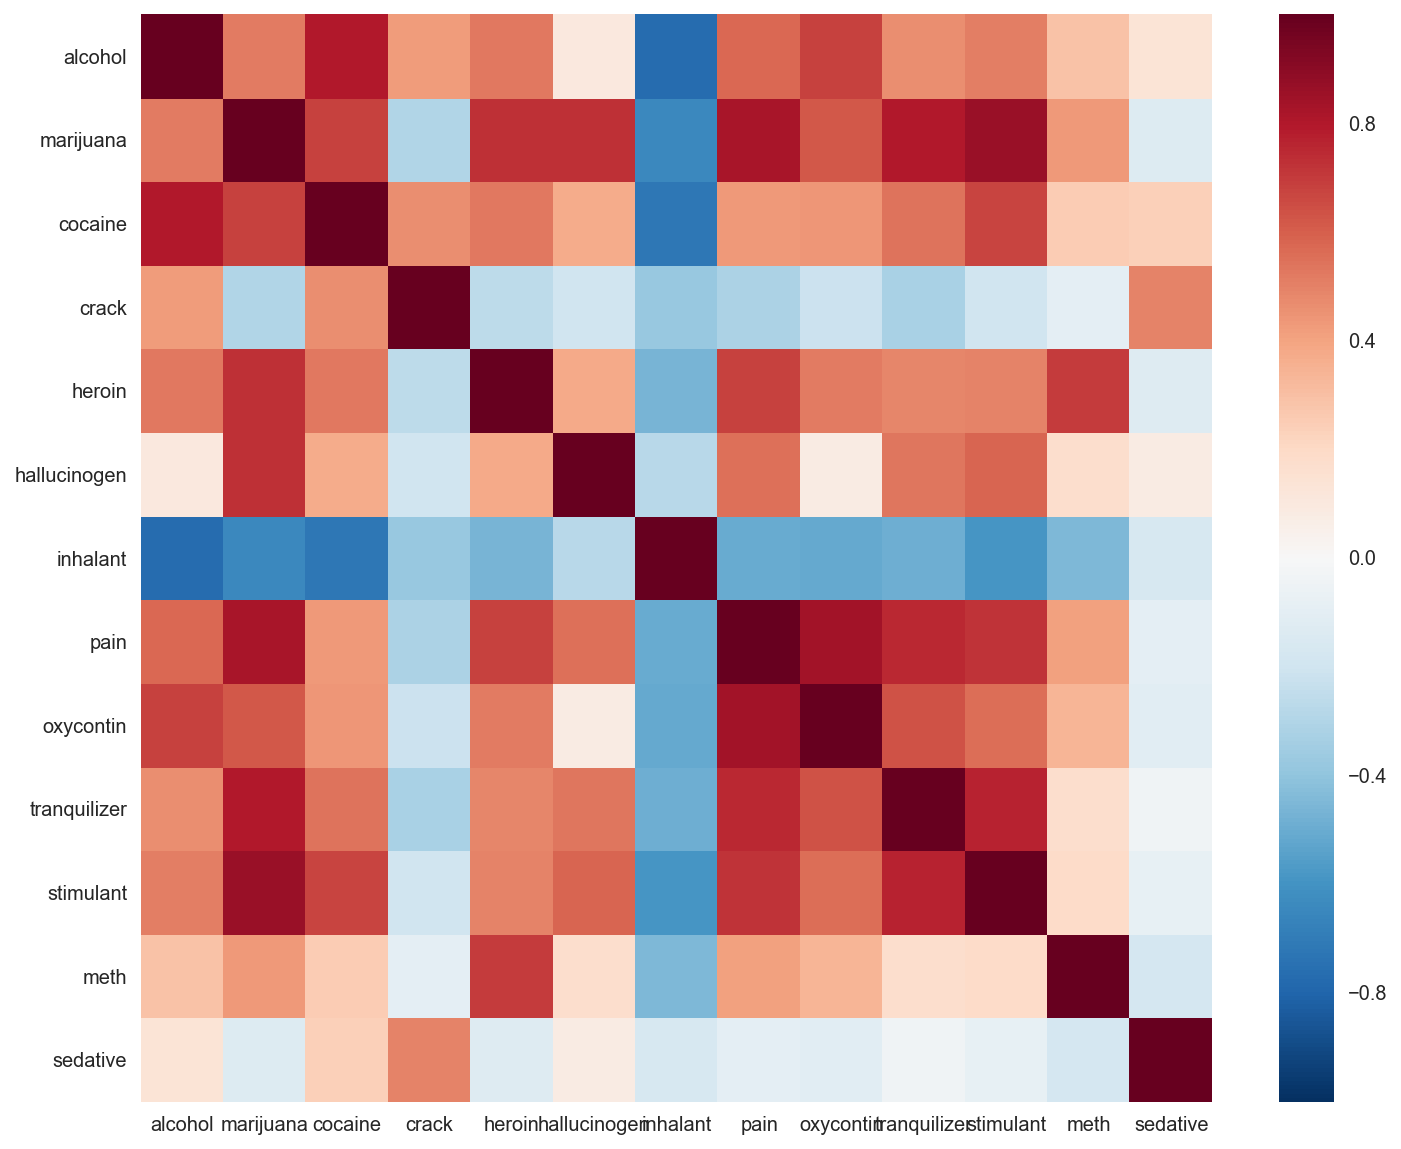

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(d_new.corr())

### 7.3 Create a testable hypothesis about this data

** Question and deliverables**

- Question:
    Will high alcohol use result in high marijuana use?
- Deliverables:
    Based on figures about alcohol use and marijuana use, see if there is a strong relationship between their usages.

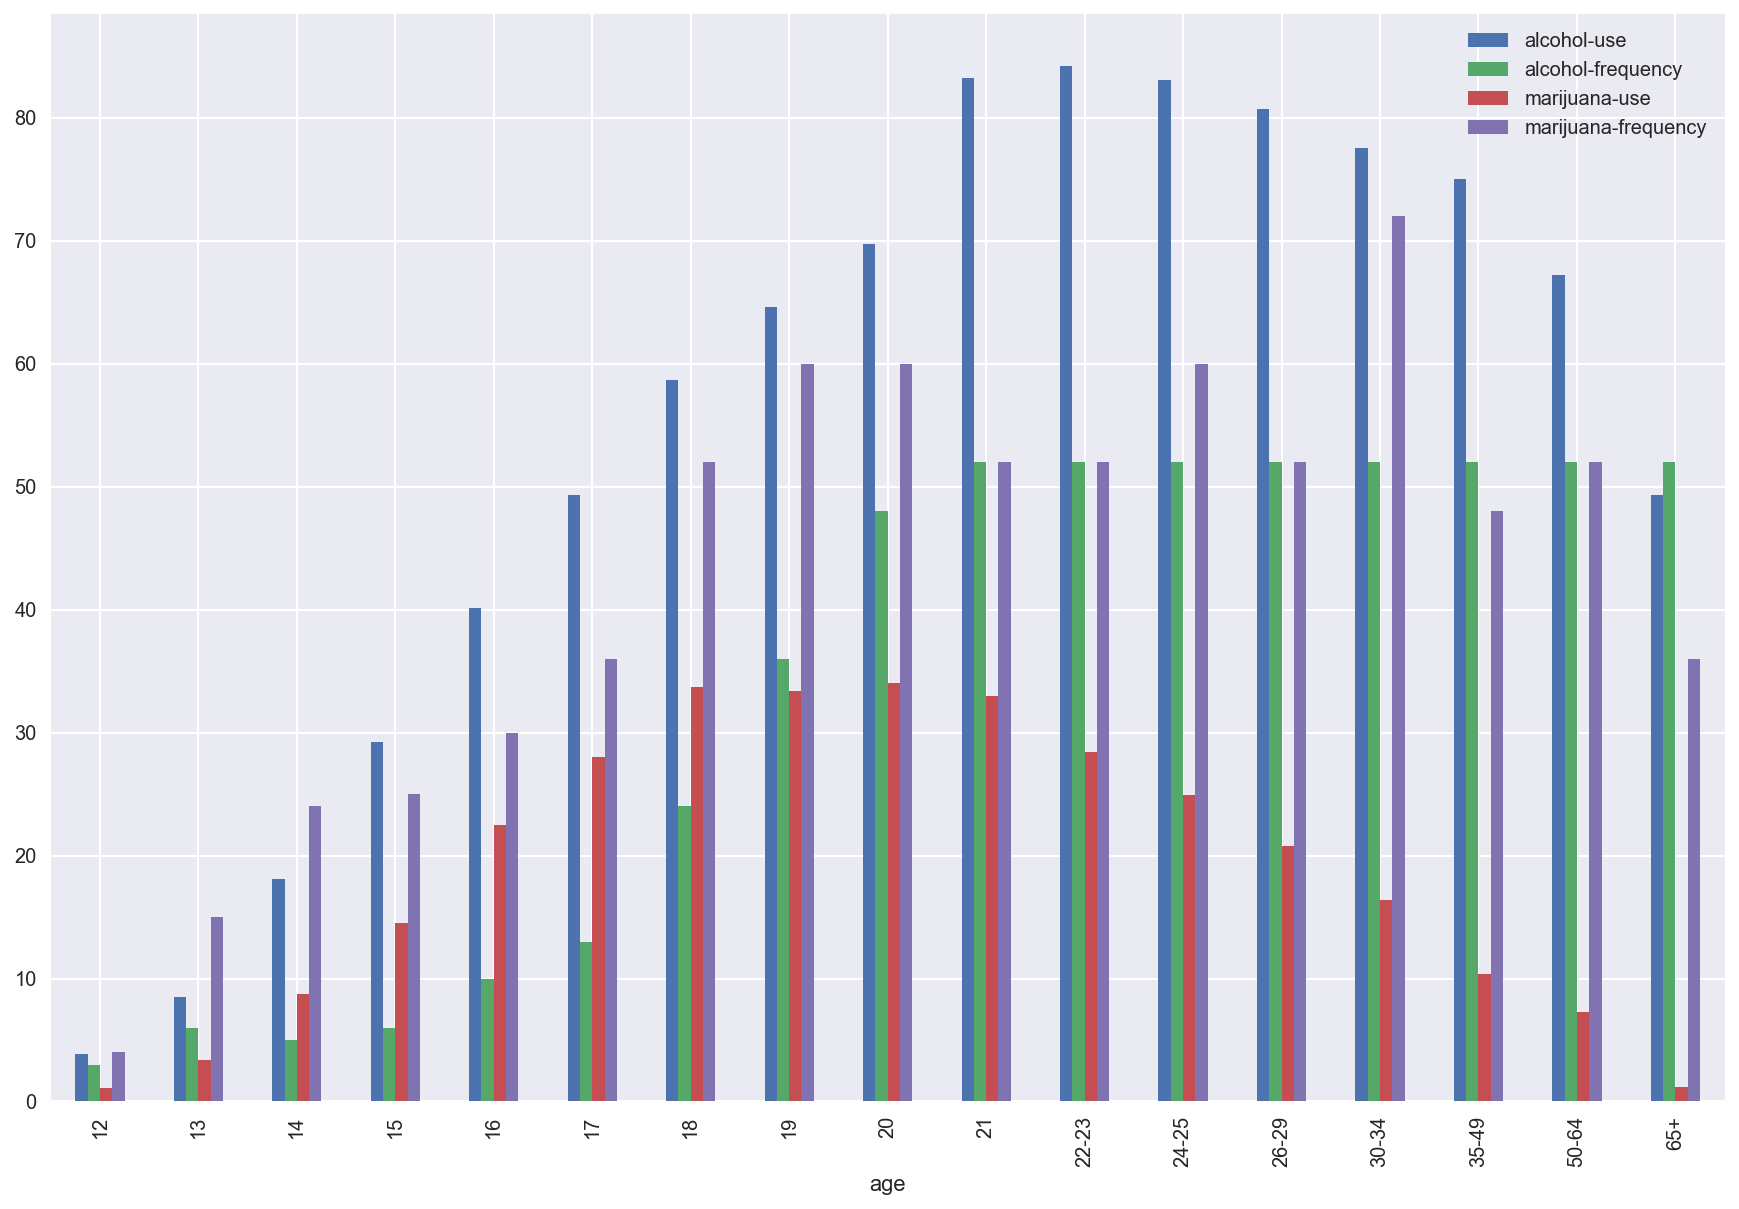

In [36]:
hy = df.iloc[:,1:5]
hy.plot.bar(figsize=(15,10))

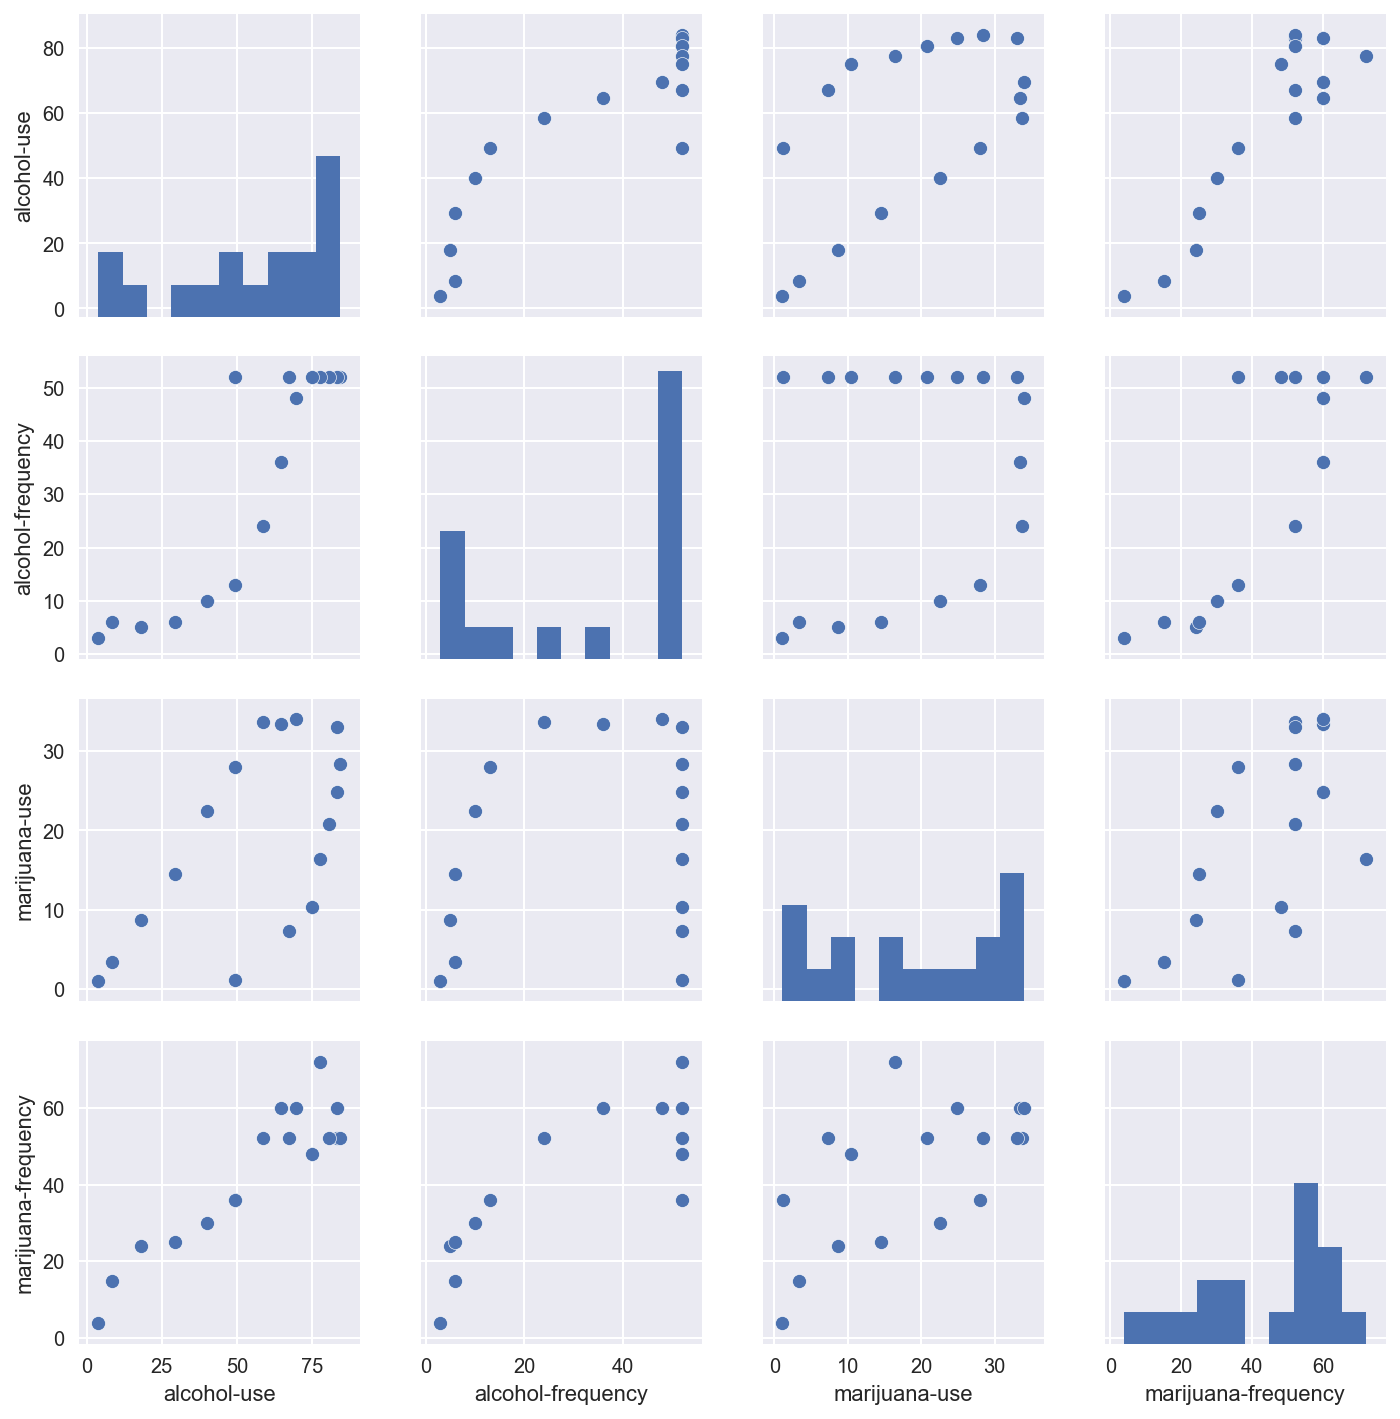

In [37]:
sns.pairplot(data=hy)

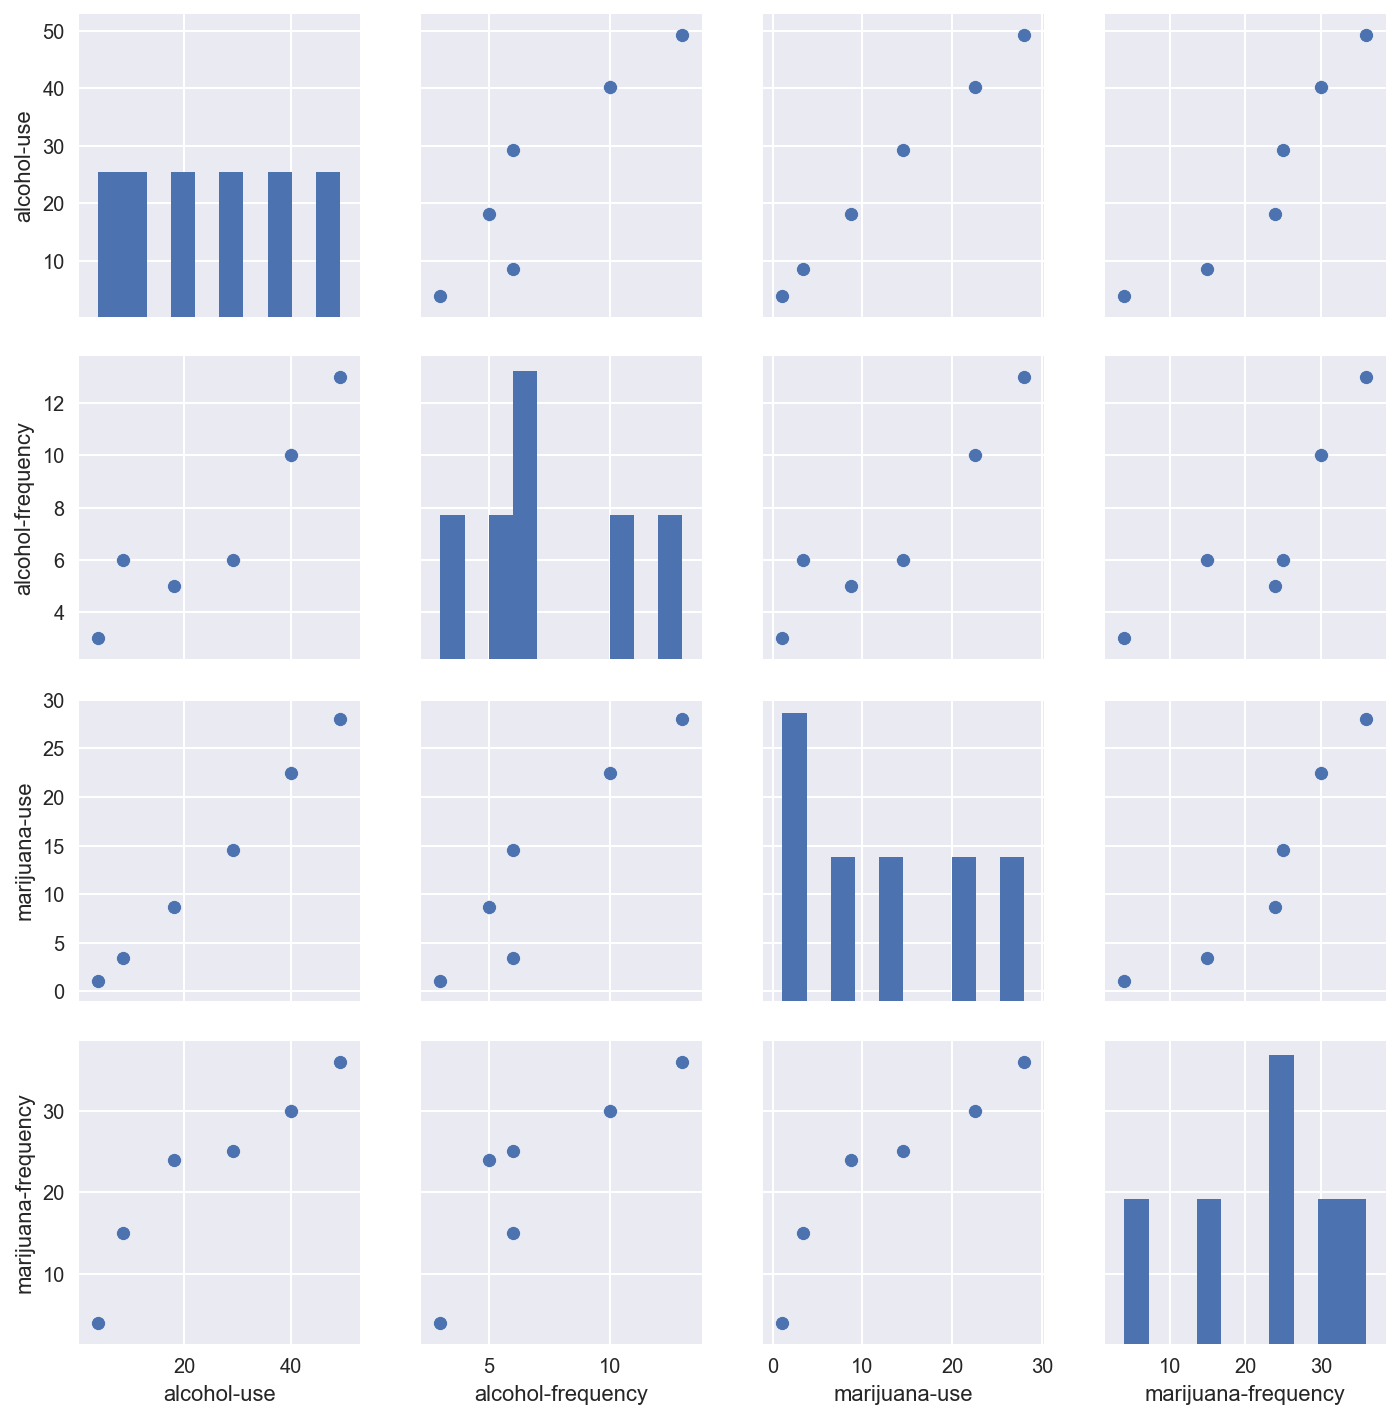

In [72]:
sns.pairplot(hy.iloc[:6,:])

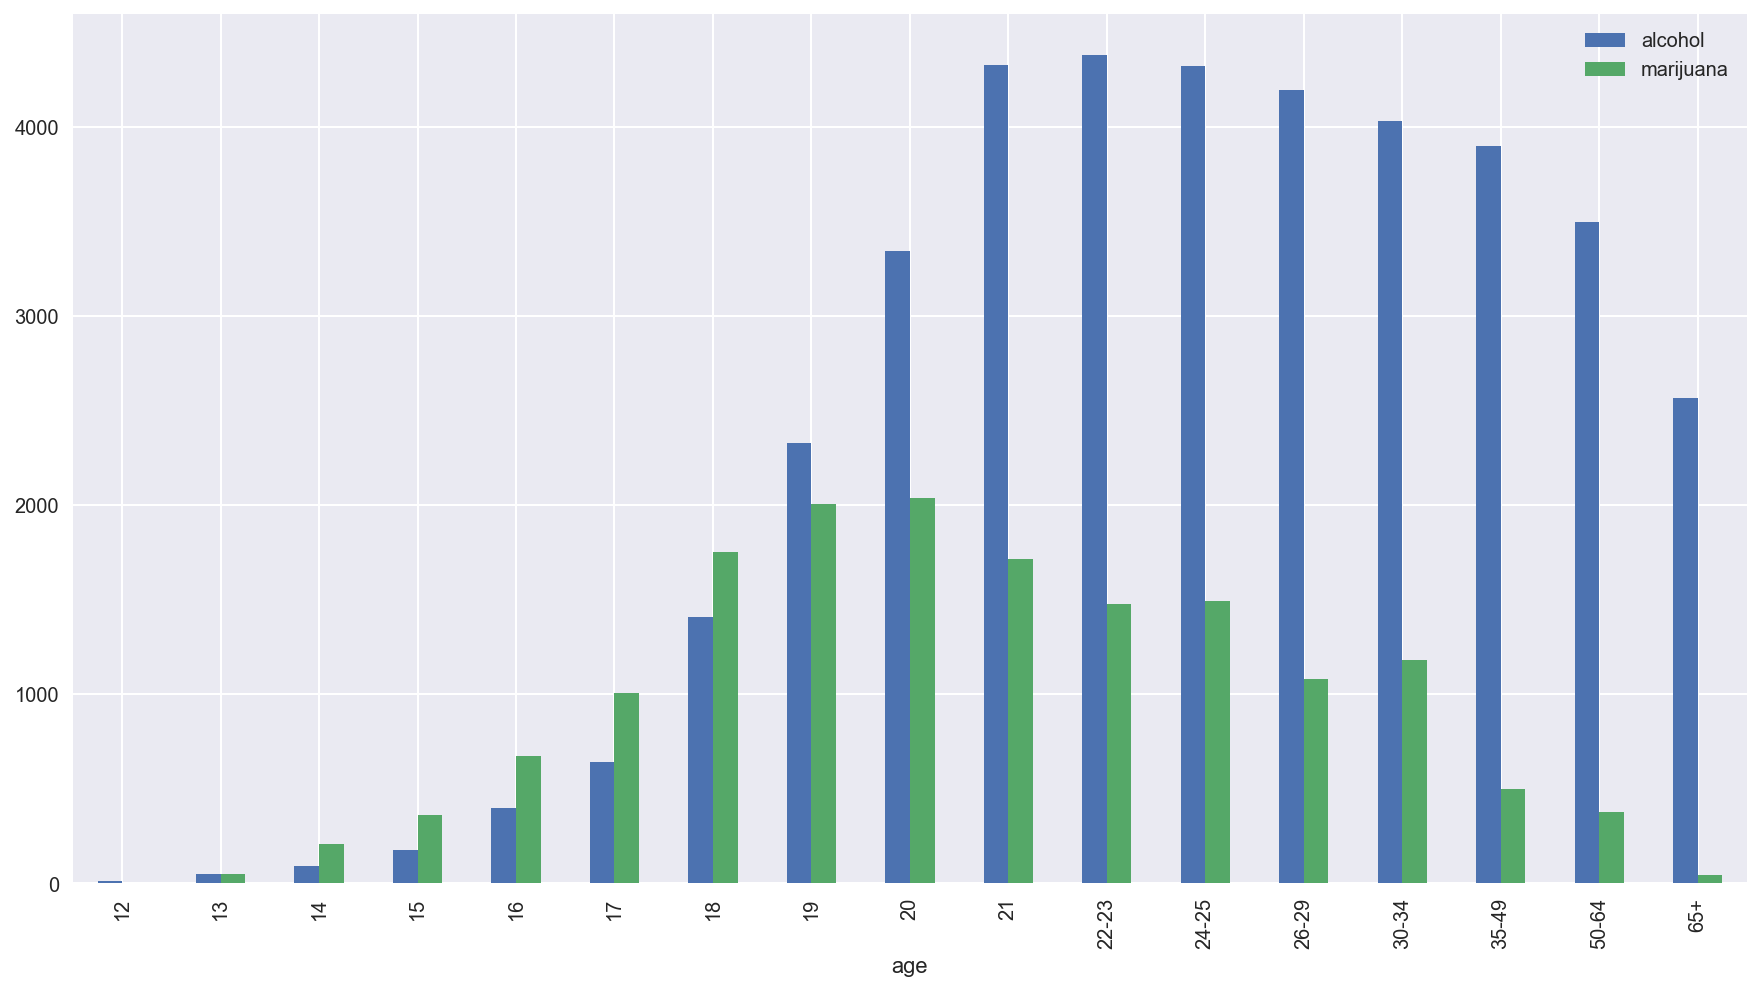

In [81]:
d_new.iloc[:,:2].plot.bar(figsize=[15,8])

# **Report**

1. In the age range from 12 to 18, there is a strong correlation between alcohol and marijuana use.
2. In the age range from 12 to 18, there is a strong correlation between alcohol and marijuana use frequency.
3. As to age above 18, there is no relation btween alcohol and marijuana use.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Original data: mean-37.1538461538, median-33.5, std-27.3017880729


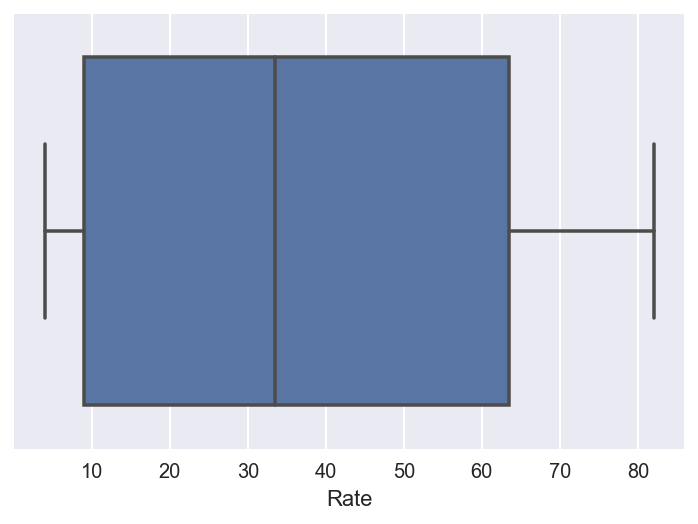

In [65]:
rate = sat_df.Rate
print 'Original data: mean-{}, median-{}, std-{}'.format(rate.mean(), rate.median(), rate.std())
rate.describe()
sns.boxplot(rate)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compared to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [85]:
# Pearson correlation:
# The Pearson correlation evaluates the linear relationship between two continuous variables. 
# Spearman rank correlation:
# The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [100]:
def value2perc(n):
    return np.percentile(rate, n)

sat_df['RatePercentile'] = rate.map(value2perc)
sat_df[sat_df.State == 'CA']

,State,Rate,Verbal,Math,RatePercentile
23,CA,51,498,517,34.11


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

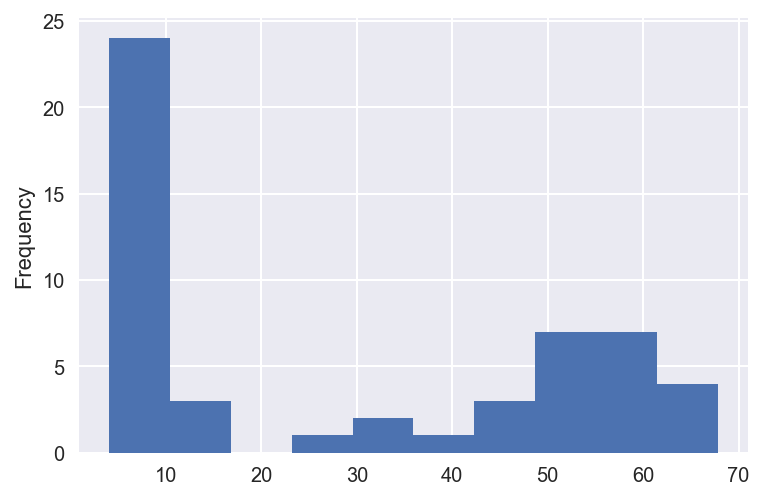

In [102]:
sat_df.RatePercentile.plot.hist()

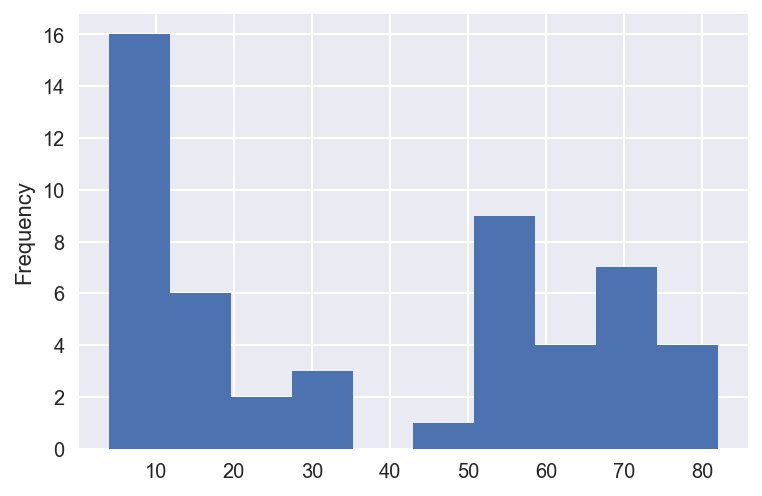

In [103]:
sat_df.Rate.plot.hist()